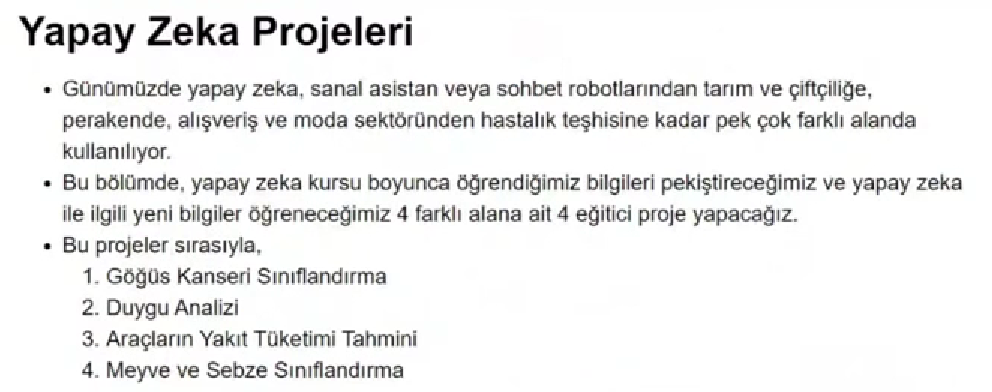

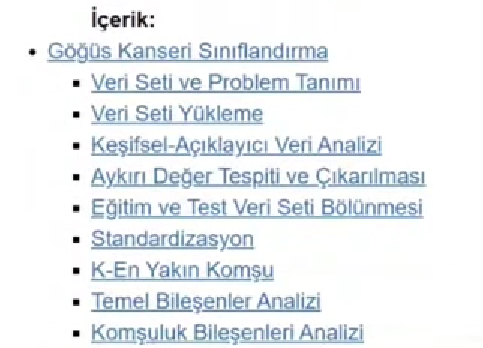

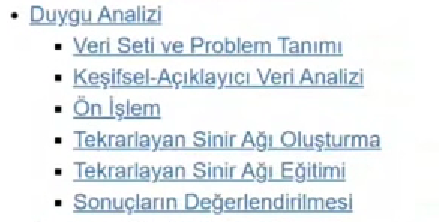

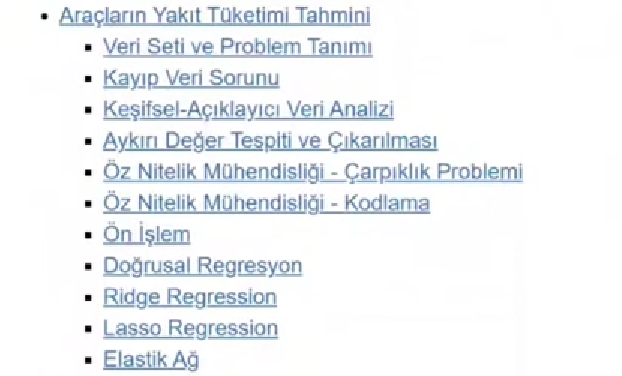

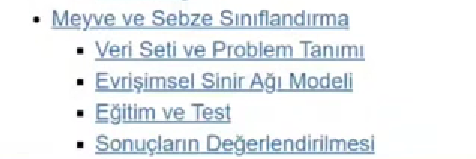

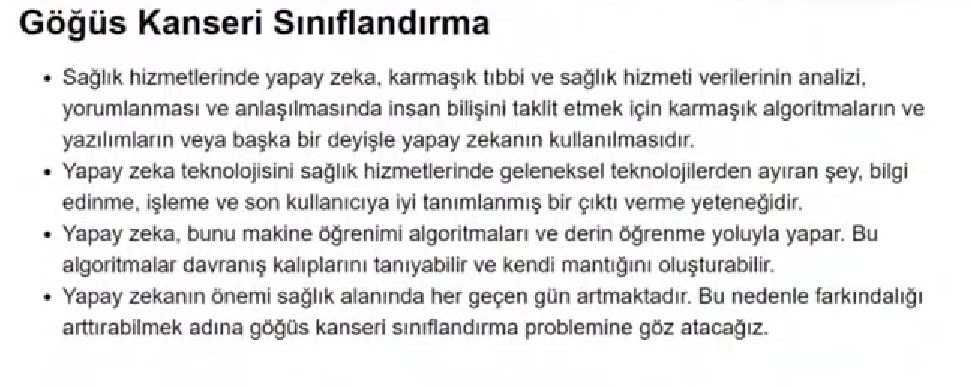

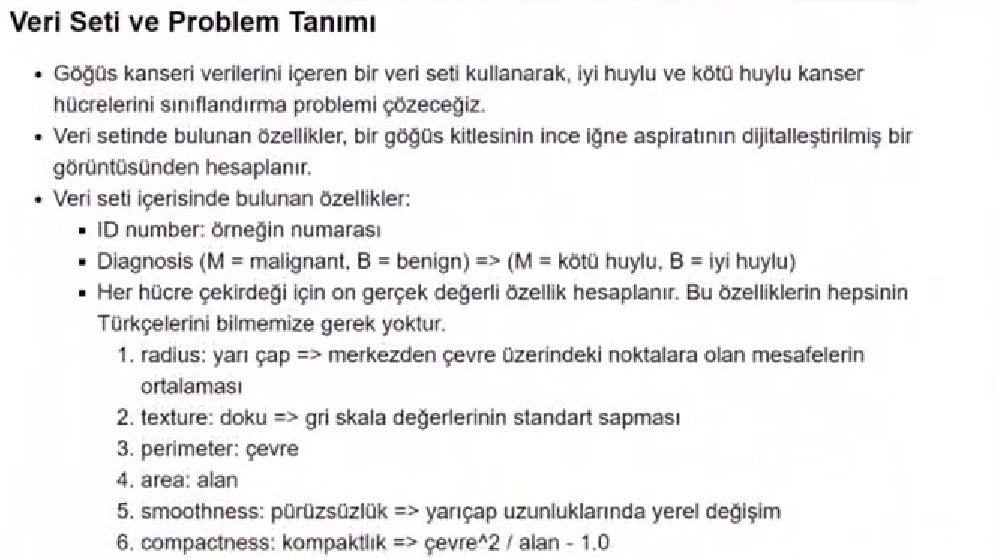

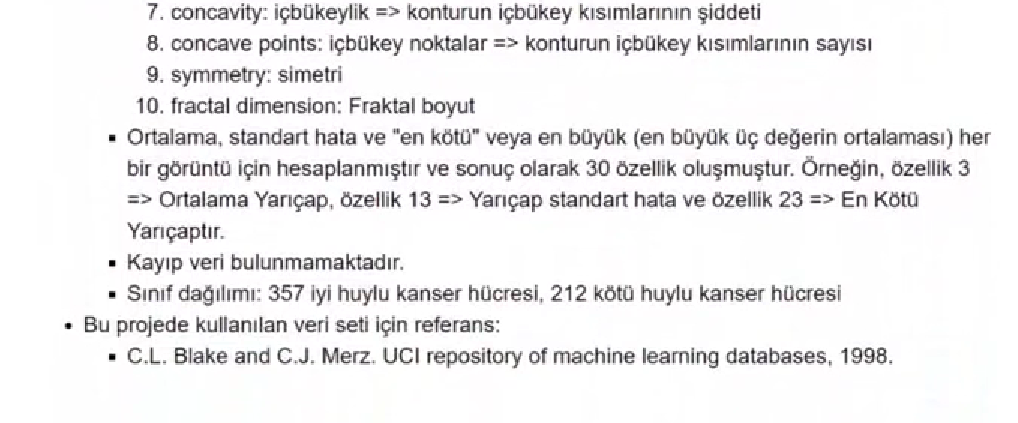

In [3]:
# Importing Libraries
# Basic Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
os.chdir('C:/Users/ST27/Desktop/EDU/DS/BootCamp/1. Data sources/AEY')

data = pd.read_csv('breast-cancer.csv')
print(f'Data Size : {data.shape}')
data.head()

Data Size : (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
# Remove unnecessary features
data.drop(['id'], inplace=True, axis=1)

In [48]:
# Rename the diagnosis column to 'hedef' (target)
data = data.rename(columns={"diagnosis": "target"})

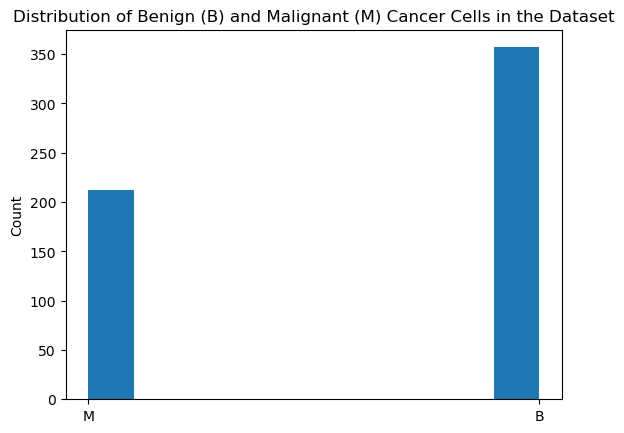

target
B    357
M    212
Name: count, dtype: int64


In [49]:
# Visualize the distribution of the target variable
plt.figure()
plt.hist(data['target'])
plt.ylabel("Count")
plt.title("Distribution of Benign (B) and Malignant (M) Cancer Cells in the Dataset")
plt.show()
print(data.target.value_counts())

In [50]:
# Convert the target variable to binary: 'M' -> 1, 'B' -> 0
data['target'] = [1 if i.strip() == "M" else 0 for i in data.target]
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [51]:
print(f'Length of data : {len(data)}')

Length of data : 569


In [52]:
print(f'Shape of data : {data.shape}')

Shape of data : (569, 31)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [54]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


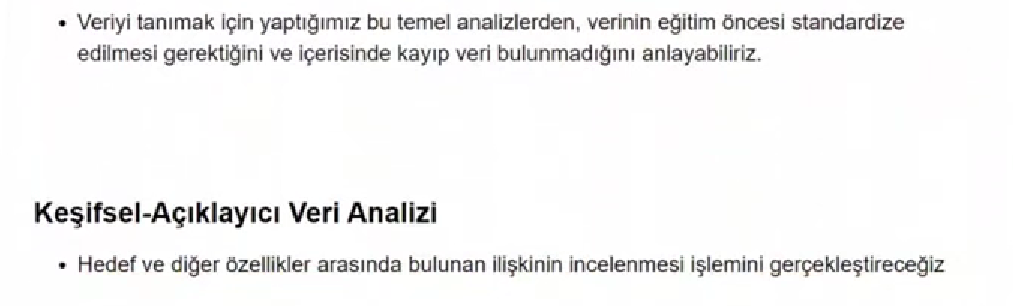

<Figure size 1200x800 with 0 Axes>

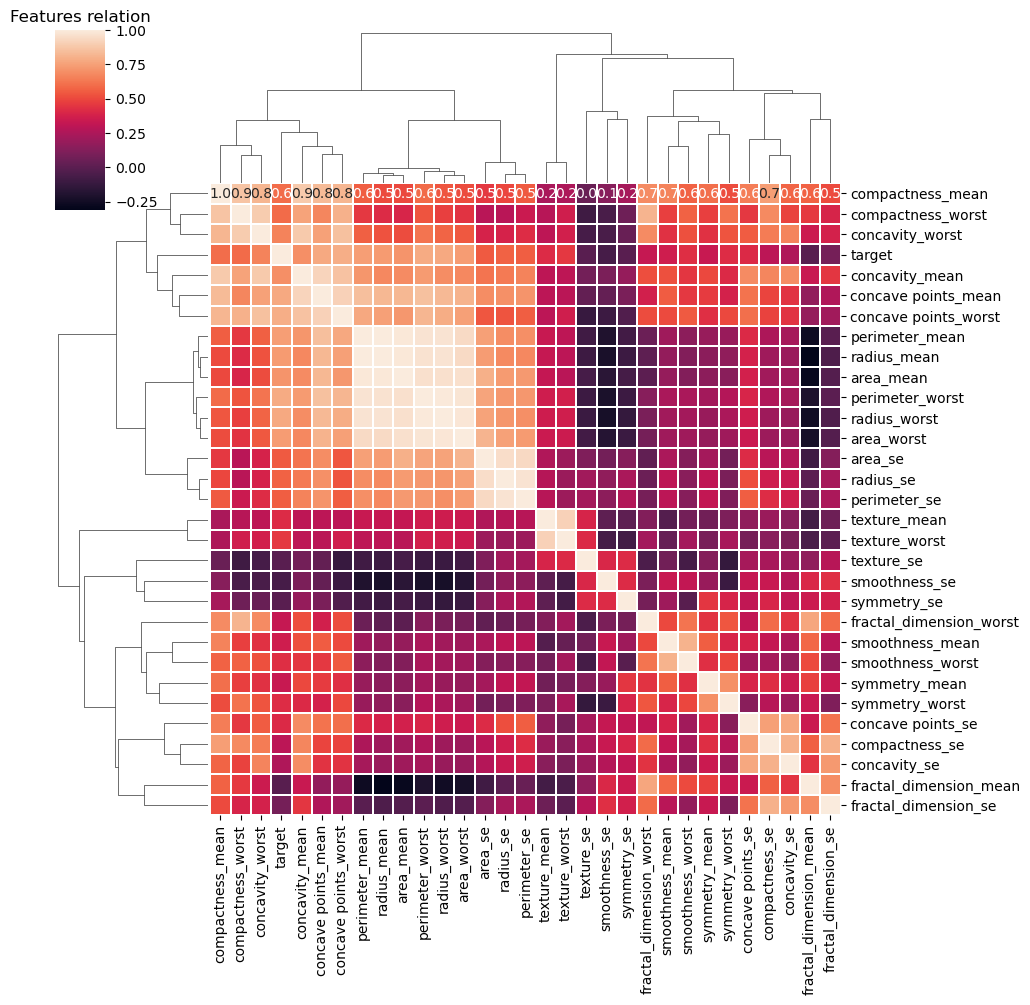

In [55]:
corr_matrix = data.corr()
plt.figure(figsize = (12,8))
sns.clustermap(corr_matrix, annot = True, fmt = ".1f", linewidths = .01)
plt.title("Features relation")
plt.show()

<Figure size 640x480 with 0 Axes>

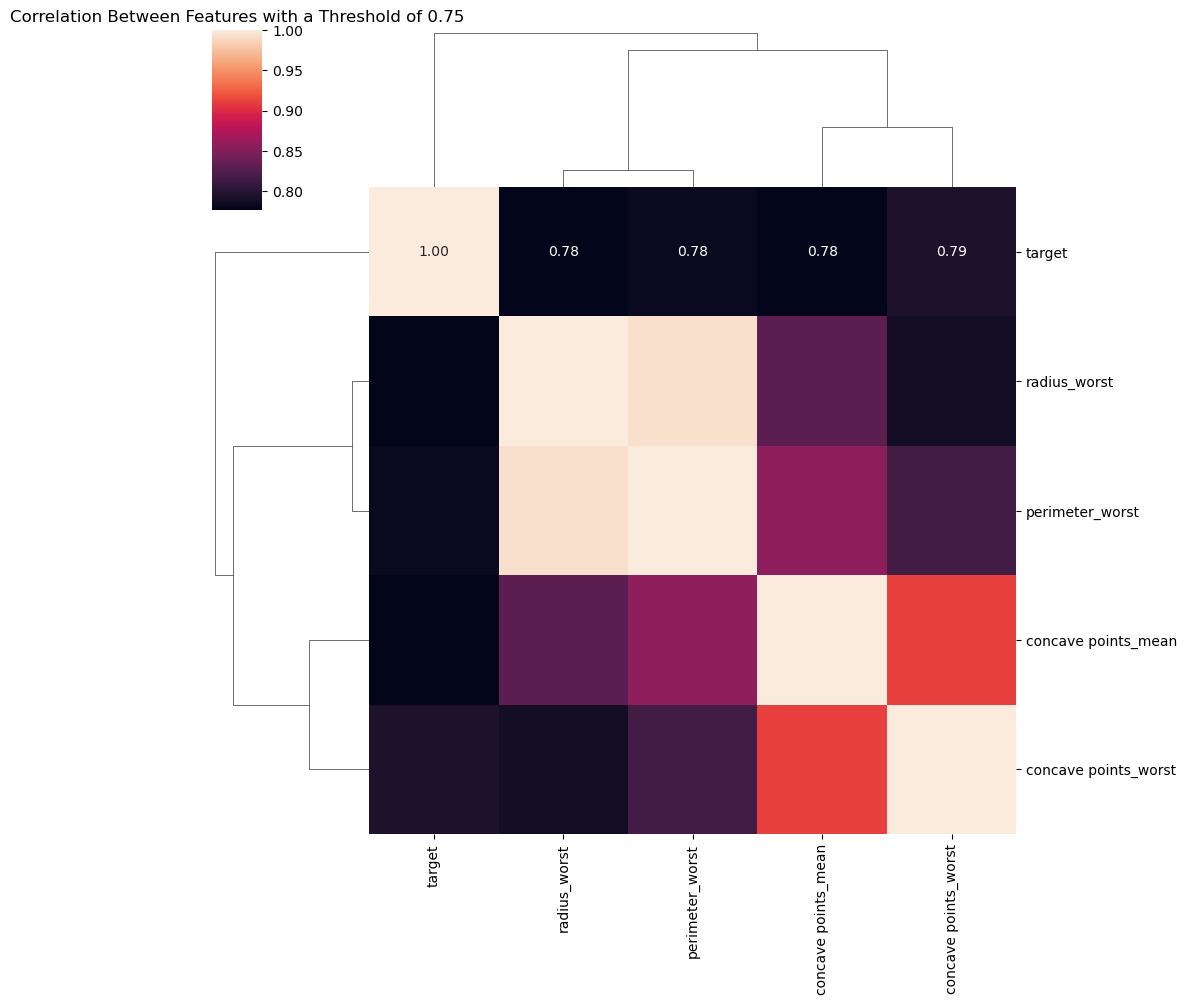

In [56]:
# Set the threshold for correlation
threshold = 0.75

# Filter features with correlation greater than the threshold with the target variable
filtro = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtro].tolist()

# Plot the correlation matrix of the filtered features
plt.figure()
sns.clustermap(data[corr_features].corr(), annot=True, fmt=".2f")
plt.title("Correlation Between Features with a Threshold of 0.75")
plt.show()

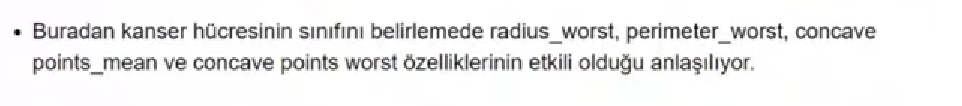

<Figure size 640x480 with 0 Axes>

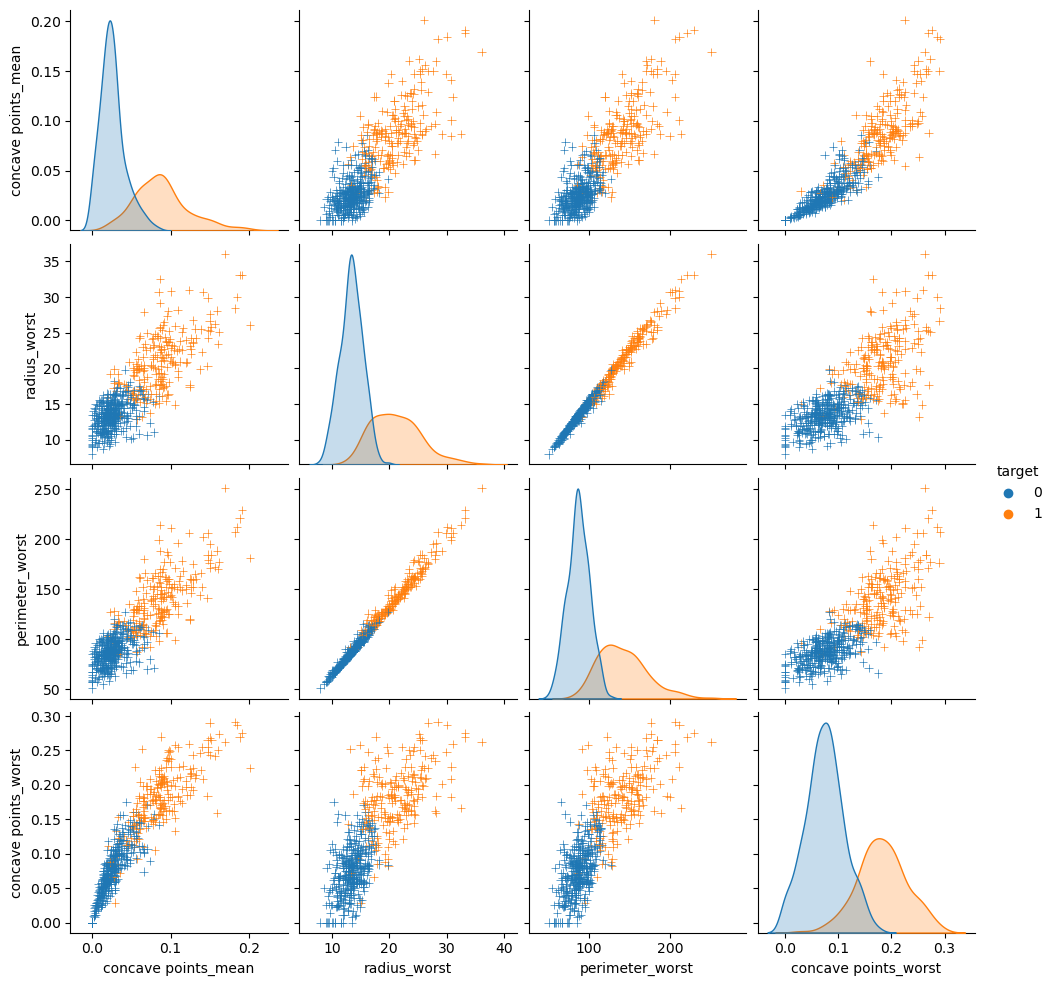

In [57]:
plt.figure()
sns.pairplot(data[corr_features], diag_kind = 'kde', markers = '+', hue = 'target')
plt.show()

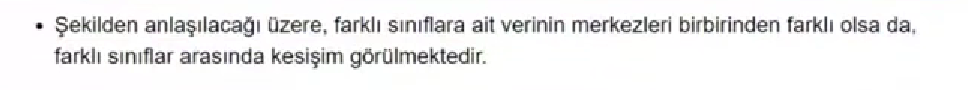

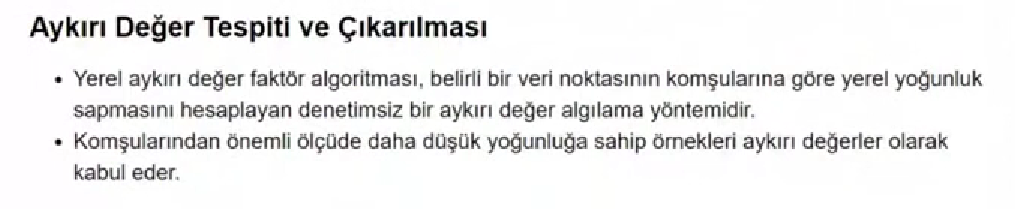

In [59]:
x = data.drop(['target'], axis = 1)
y = data.target
columns = x.columns.tolist()

In [60]:
clf = LocalOutlierFactor()

In [61]:
y_pred = clf.fit_predict(x)

In [62]:
X_score = clf.negative_outlier_factor_

In [63]:
outlier_score = pd.DataFrame()
outlier_score['score'] = X_score

In [64]:
threshold = -2.2
filter = outlier_score['score'] < threshold
outlier_index = outlier_score[filter].index.tolist()

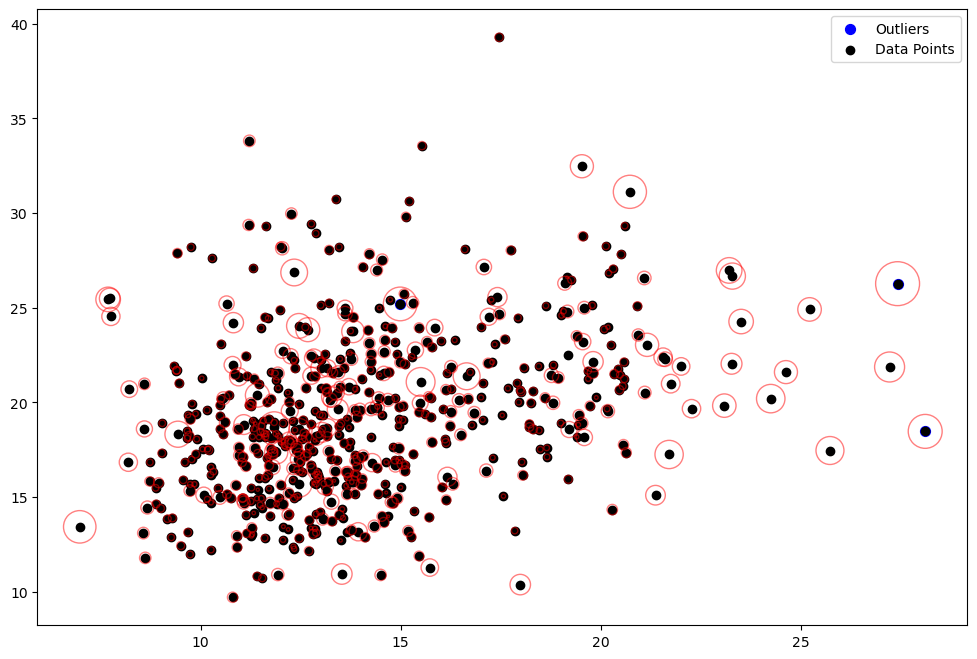

In [70]:
plt.figure(figsize = (12,8))
plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index, 1], color = 'blue', s = 50, label = 'Outliers')
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', label = 'Data Points')
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score['radius'] = radius
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', alpha = 0.5, facecolors = 'none')
plt.legend()
plt.show()

In [71]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42) 

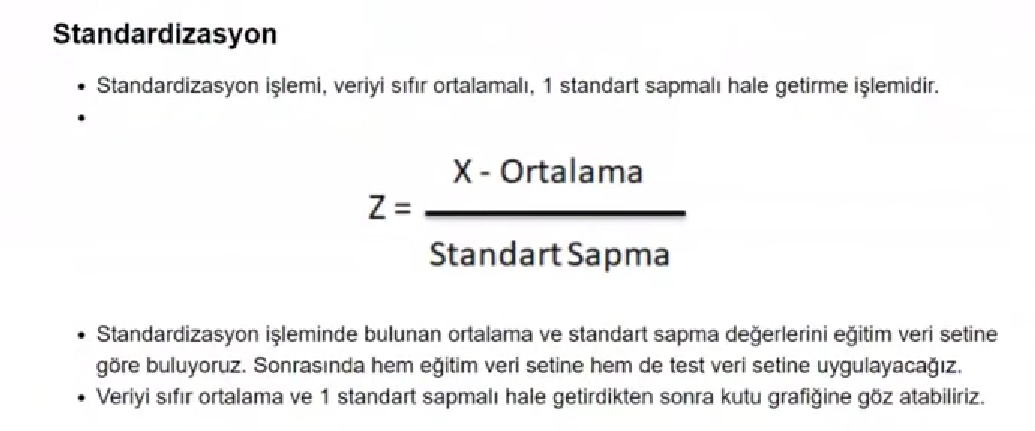

In [76]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
X_graph = pd.DataFrame(X_train, columns = columns)
X_graph_desc = X_graph.describe()
X_graph['target'] = Y_train

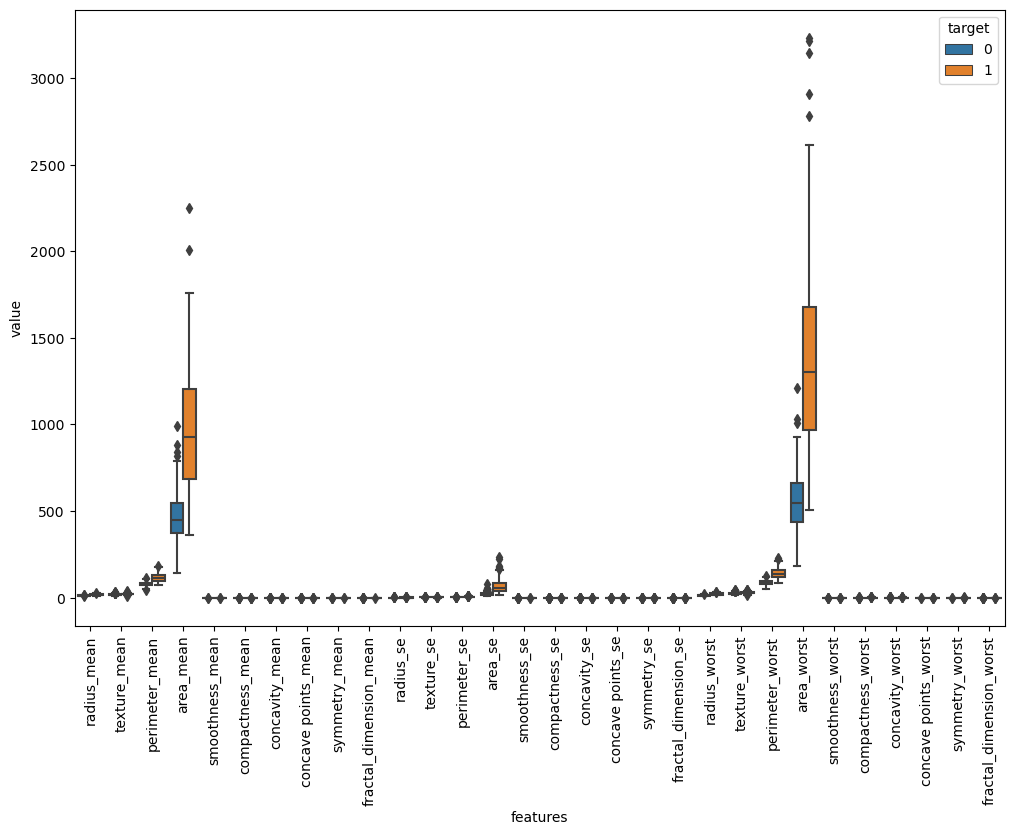

In [78]:
data_melted = pd.melt(X_graph, id_vars = 'target', var_name = 'features', value_name = 'value')
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'features', y = 'value', hue = 'target', data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [80]:
# Fit a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [84]:
# Predict and evaluate the model
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", cm)

Accuracy: 0.6
Confusion Matrix:
 [[102   0]
 [ 68   0]]


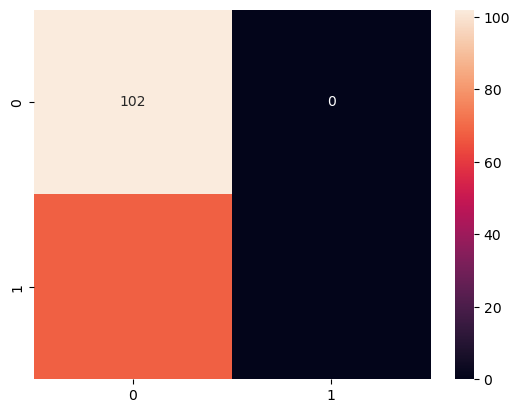

In [85]:
plt.figure()
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.show()

In [86]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.6


In [94]:
# Function to find the best k value
def bestParameters(X_train, X_test, Y_train, Y_test):
    # Range of k values
    k_range = list(range(1, 31))
    
    # Weight options for KNN
    weight_options = ["uniform", "distance"]
    
    # Create a parameter grid for grid search
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    
    # KNN classifier
    knn = KNeighborsClassifier()
    
    # Grid search with cross-validation
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    
    # Fit the model
    grid.fit(X_train, Y_train)
    
    # Print the best score and parameters
    print("Best training score: {:.2f} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(X_train, Y_train)

    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    cm_test = confusion_matrix(Y_test, y_pred_test)
    cm_train = confusion_matrix(Y_train, y_pred_train)

     # Accuracy scores
    acc_test = accuracy_score(Y_test, y_pred_test)
    acc_train = accuracy_score(Y_train, y_pred_train)
    
    # Print accuracy scores
    print("Test accuracy: {:.2f}, Training accuracy: {:.2f}".format(acc_test, acc_train))
    
    # Confusion matrices
    cm_test = confusion_matrix(Y_test, y_pred_test)
    cm_train = confusion_matrix(Y_train, y_pred_train)
    
    # Print confusion matrices
    print("\nConfusion Matrix Test:")
    print(cm_test)
    print("\nConfusion Matrix Training:")
    print(cm_train)
    
    return grid
    

In [95]:
grid = bestParameters(X_train, X_test, Y_train, Y_test)

Best training score: 0.94 with parameters: {'n_neighbors': 8, 'weights': 'distance'}

Test accuracy: 0.60, Training accuracy: 1.00

Confusion Matrix Test:
[[102   0]
 [ 68   0]]

Confusion Matrix Training:
[[255   0]
 [  0 141]]


In [97]:
# Principal Component Analysis (PCA)

# Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Define PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA
pca.fit(x_scaled)

# Apply PCA transformation
x_reduced_pca = pca.transform(x_scaled)

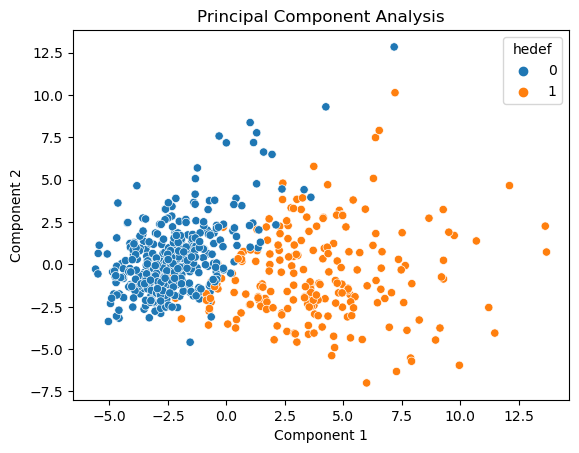

In [98]:
# Convert PCA results to a DataFrame for visualization
pca_data = pd.DataFrame(x_reduced_pca, columns=["p1", "p2"])
pca_data["hedef"] = y

# Plot the PCA results
plt.figure()
sns.scatterplot(x="p1", y="p2", hue="hedef", data=pca_data)
plt.title("Principal Component Analysis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [99]:
# Split the PCA-transformed data into training and testing sets
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_pca, y, test_size=0.3, random_state=42)

In [101]:
# Find the best KNN parameters for the PCA-transformed data
grid_pca = bestParameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Best training score: 0.95 with parameters: {'n_neighbors': 7, 'weights': 'uniform'}

Test accuracy: 0.93, Training accuracy: 0.95

Confusion Matrix Test:
[[97  5]
 [ 7 61]]

Confusion Matrix Training:
[[247   8]
 [ 10 131]]


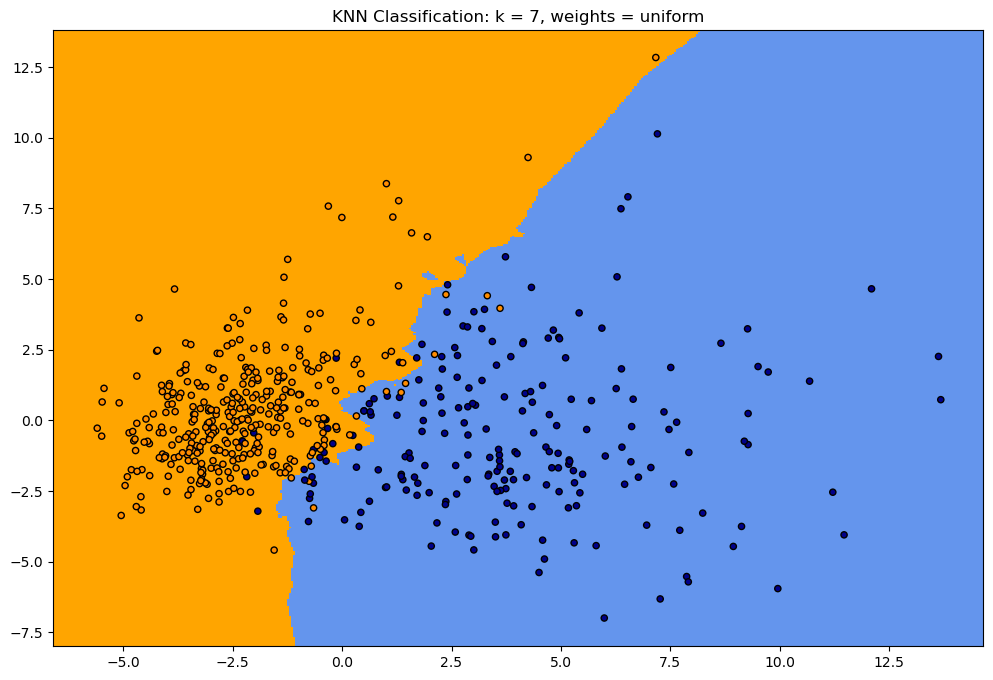

In [102]:
# Predict and visualize the PCA-transformed data

# Define color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

# Mesh size
h = 0.05
X = x_reduced_pca

# Define the min and max values for the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the prediction to match the mesh grid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Set plot title with best parameters
plt.title("KNN Classification: k = {}, weights = {}".format(
    grid_pca.best_estimator_.n_neighbors,
    grid_pca.best_estimator_.weights))

# Show plot
plt.show()

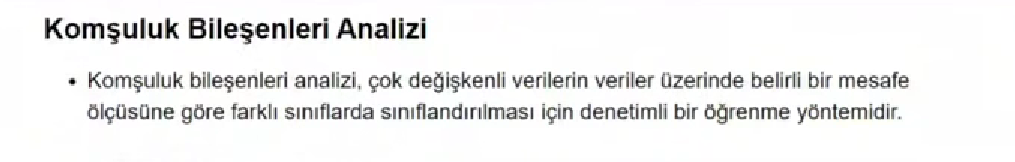

In [103]:
# Define Neighborhood Components Analysis (NCA) with 2 components
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

# Fit NCA
nca.fit(x_scaled, y)

# Apply NCA transformation
x_reduced_nca = nca.transform(x_scaled)

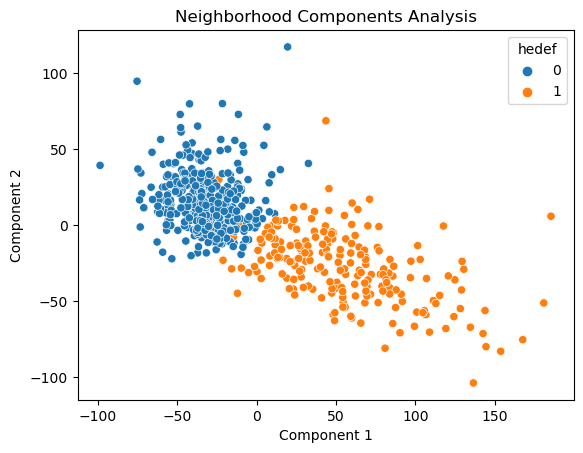

In [104]:
# Convert NCA results to a DataFrame for visualization
nca_data = pd.DataFrame(x_reduced_nca, columns=["p1", "p2"])
nca_data["hedef"] = y

# Plot the NCA results
plt.figure()
sns.scatterplot(x="p1", y="p2", hue="hedef", data=nca_data)
plt.title("Neighborhood Components Analysis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [106]:
# Split the NCA-transformed data into training and testing sets
x_train_nca, x_test_nca, y_train_nca, y_test_nca = train_test_split(x_reduced_nca, y, test_size=0.3, random_state=42)

# Find the best KNN parameters for the NCA-transformed data
grid_nca = bestParameters(x_train_nca, x_test_nca, y_train_nca, y_test_nca)

Best training score: 0.99 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test accuracy: 0.98, Training accuracy: 1.00

Confusion Matrix Test:
[[101   1]
 [  3  65]]

Confusion Matrix Training:
[[255   0]
 [  0 141]]


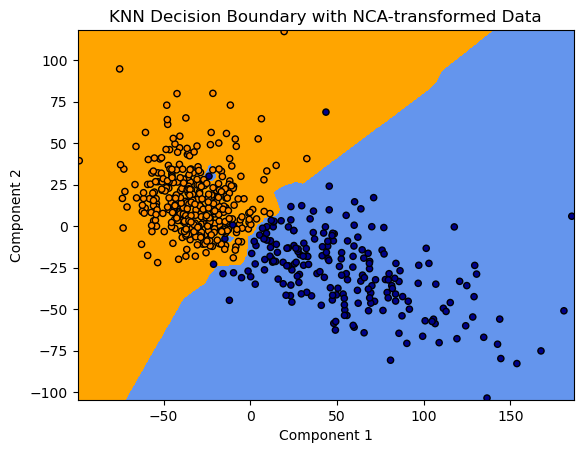

In [107]:
# Predict and visualize the NCA-transformed data

# Define color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

# Mesh size
h = 0.2
X = x_reduced_nca

# Define the min and max values for the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the prediction to match the mesh grid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundary with NCA-transformed Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()